In [1]:
import os

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from dosipy.constants import eps_0
from dosipy.utils.integrate import elementwise_dblquad, elementwise_rectquad

from utils import fraunhofer_distance, reflection_coefficient

In [2]:
sns.set_theme(style='ticks',
              font_scale=1.5,
              palette='colorblind',
              rc={'text.usetex': True,
                  'text.latex.preamble': r'\usepackage{amsmath}',
                  'font.family': 'serif'})

In [3]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [14]:
df = pd.read_csv(os.path.join('data', '03_Li_2022_data_table_6.csv'))

In [4]:
# exposed surface
xy = np.linspace(-0.01, 0.01)

# integration area
A_4 = 4 / 100 / 100
A_1 = A_4 / 4

In [25]:
# power density distribution on the exposed surface
PDinc = np.load(os.path.join('data', '02_power_density_d5mm_f10GHz.npy'))

In [26]:
# averaged total incident power density on the surface
PDinc_n = PDinc[:, :, 2].real
PDinc_tot = np.sqrt(PDinc[:, :, 0] ** 2
                    + PDinc[:, :, 1] ** 2
                    + PDinc[:, :, 2] ** 2).real

In [27]:
sPDinc_n_1 = 1 / (2 * A_1) * elementwise_rectquad(xy[12:37], xy[12:37], PDinc_n[12:37, 12:37])
sPDinc_tot_1 = 1 / (2 * A_1) * elementwise_rectquad(xy[12:37], xy[12:37], PDinc_tot[12:37, 12:37])
sPDinc_n_1, sPDinc_tot_1

(24.869580396426844, 26.491418321603252)

In [12]:
sPDinc_n_4 = 1 / (2 * A_4) * elementwise_rectquad(xy, xy, PDinc_n)
sPDinc_tot_4 = 1 / (2 * A_4) * elementwise_rectquad(xy, xy, PDinc_tot)
sPDinc_n_4, sPDinc_tot_4

(7.059273691089844, 8.12713653967229)

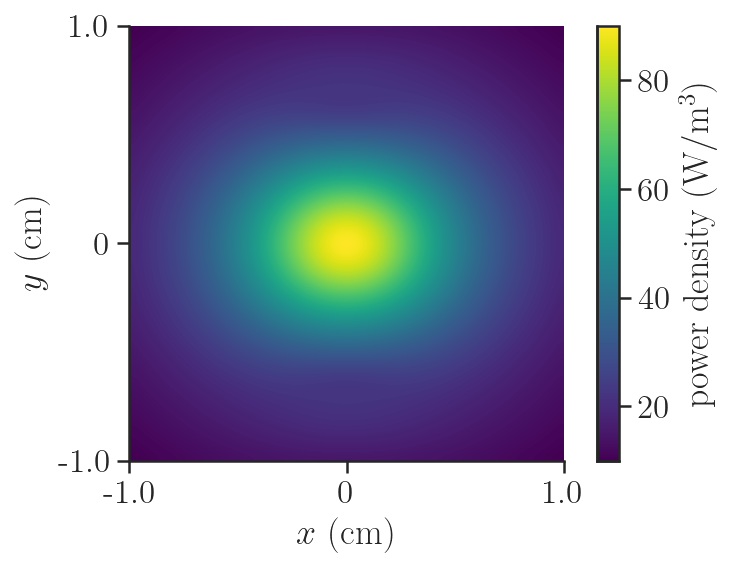

In [54]:
# visualize
fig, ax = plt.subplots()
xmin, xmax = xt_4.min(), xt_4.max()
ymin, ymax = yt_4.min(), yt_4.max()
bbox = [xmin, xmax, ymin, ymax]
cm = ax.imshow(PDinc_tot,
               extent=bbox,
               origin='lower',
               interpolation='bicubic',
               cmap='viridis')
cb = fig.colorbar(cm, ax=ax,
                  label='power density (W$/$m$^3$)')
ax.set(xlabel='$x$ (cm)',
       ylabel='$y$ (cm)',
       xticks=[xmin, 0, xmax],
       yticks=[ymin, 0, ymax],
       xticklabels=[xmin * 100, 0, xmax * 100],
       yticklabels=[ymin * 100, 0, ymax * 100])
sns.despine(fig=fig, ax=ax)

In [31]:
# averaged total incident power density on the surface
PDinc_n = abs(PDinc[:, :, 2])

In [32]:
sPDinc_n_4 = 1 / (2 * A_4) * elementwise_rectquad(xt_4, yt_4, PDinc_n)
sPDinc_n_1 = 1 / (2 * A_1) * elementwise_rectquad(yt_1, yt_1, PDinc_n)
sPDinc_n_4, sPDinc_n_1

(16.18774643094646, 8.09387321547323)

In [ ]:
# visualize
fig, ax = plt.subplots()
xmin, xmax = xt.min(), xt.max()
ymin, ymax = yt.min(), yt.max()
bbox = [xmin, xmax, ymin, ymax]
cm = ax.imshow(PDinc_n,
               extent=bbox,
               origin='lower',
               interpolation='bicubic',
               cmap='viridis')
cb = fig.colorbar(cm, ax=ax,
                  label='power density (W$/$m$^3$)')
ax.set(xlabel='$x$ (cm)',
       ylabel='$y$ (cm)',
       xticks=[xmin, 0, xmax],
       yticks=[ymin, 0, ymax],
       xticklabels=[xmin * 100, 0, xmax * 100],
       yticklabels=[ymin * 100, 0, ymax * 100])
sns.despine(fig=fig, ax=ax)

# Spatially averaged abosorbed power density

In [31]:
f = np.array([10, 30, 90]) * 1e9

# dry skin density, kg/m3
rho = 1109

# conductivity, S/m
sigma = np.array([8.48, 27.31, 41.94])

# dielectric constant
eps_r = np.array([32.41, 16.63, 6.83])

# reflection coefficient
eps_i = sigma / (2 * np.pi * f * eps_0)
eps = eps_r - 1j * eps_i
gamma = reflection_coefficient(eps)

# power transmission coefficient
T_tr = 1 - gamma ** 2

In [35]:
sPDab_1 = T_tr[0] * sPDinc_n_4
sPDab_1

3.4006789678714306

In [36]:
T_tr

array([0.48173213, 0.5374058 , 0.66932313])